# **Author : Abaad Murtaza**
# **Task 2 : Prediction using Unsupervised Machine Learning**
# **GRIP @ The Sparks Foundation**

From the given ‘Iris’ dataset, I tried to predict the optimum number of clusters and represented it visually.

# Importing libraries



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [6]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


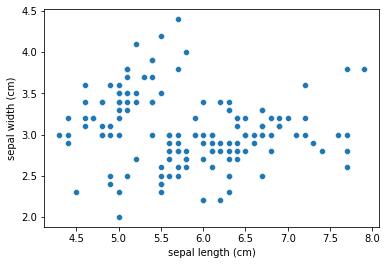

In [23]:
sns.scatterplot(x= 'sepal length (cm)', y='sepal width (cm)', data=iris_df)

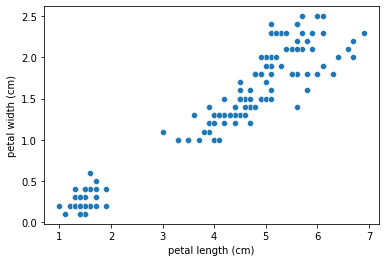

In [24]:
sns.scatterplot(x= 'petal length (cm)', y='petal width (cm)', data=iris_df)

# Finding the optimum number of clusters for K Means

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

In [11]:
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [12]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.3058152958153,
 30.06459307359308,
 28.19603652557341,
 26.04897638859996]

# Observing Elbow Method

Text(0.5, 0, 'Number of clusters')

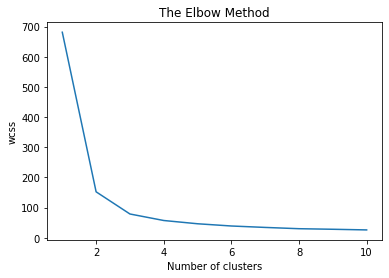

In [15]:
ax = sns.lineplot(x=range(1,11),y=wcss)
ax.set_title('The Elbow Method')
ax.set_ylabel('wcss')
ax.set_xlabel('Number of clusters')

From the above graph, the optimum clusters is where the elbow occurs that is 3 in this case.

# Applying KMeans to the dataset

In [16]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# Clusters Visualization

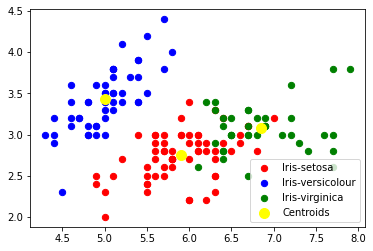

In [21]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 40, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()